# Squin gates of interest

given immutable lists `q: IList[Qubit, Literal[7]]` of qubits, and `p: float` noise rate

### Depolarizing noise channels

In [235]:
from bloqade import squin
from kirin.dialects.ilist import IList
import numpy as np
import bloqade.stim
import bloqade.tsim

# On noise 
### Using and adjusting heuristic noise model

In [236]:
# from bloqade.cirq_utils import noise
# from bloqade.cirq_utils.emit import emit_circuit
# from bloqade.cirq_utils import load_circuit


# # applying noise model to circuit according to different architectures; must use Cirq circuit
# @squin.kernel
# def main():
#     my_kernel()


# cirq_main = emit_circuit(main)  # emit to Cirq
# noise_model = (
#     noise.GeminiOneZoneNoiseModel()
# )  # define noise model; here OneZone default
# main_noisy = noise.transform_circuit(
#     cirq_main, model=noise_model
# )  # annotate circuit w noise
# squin_main = load_circuit(main_noisy)  # back to Squin
# noisy_stim = bloqade.stim.Circuit(squin_main)  # now to Stim


# # Example 1: defining new noise model on top of OneZone architecture, scaling all noise parameters by a constant factor
# noise_scale = 1
# noise_model_1 = noise.GeminiOneZoneNoiseModel(scaling_factor=noise_scale)

# # Example 2: changing just some of the channels: no local phase-z errors
# noise_model_2 = noise.GeminiOneZoneNoiseModel(local_pz=0.0)

In [237]:
@squin.kernel
def MSD_test():
    q = squin.qalloc(7)  # allocate qubits
    squin.u3(0,0,0,q[6])
    for i in range(6):
        squin.sqrt_y_adj(q[i])
    # [squin.broadcast.sqrt_y_adj(q[i]) for i in range(5)]
    squin.cz(q[1], q[2])
    squin.cz(q[3], q[4])
    squin.cz(q[5], q[6])
    squin.sqrt_y(q[6])
    squin.cz(q[0],q[3])
    squin.cz(q[2],q[5])
    squin.cz(q[4],q[6])
    for i in range(5):
        squin.sqrt_y(q[i+2])
    # [squin.broadcast.sqrt_y(q[i+2]) for i in range(5)]
    squin.cz(q[0],q[1])
    squin.cz(q[2],q[3])
    squin.cz(q[4],q[5])
    squin.sqrt_y(q[1])
    squin.sqrt_y(q[2])
    squin.sqrt_y(q[4])
    squin.broadcast.measure(q)

In [238]:
MSD_enc = MSD_test
stim_circ = bloqade.stim.Circuit(MSD_enc)
sampler = stim_circ.compile_sampler()
samples = sampler.sample(shots=100)
result = 1 - 2 * samples.astype(int)
import numpy as np
print(f"ExpVal:{np.mean(np.array([i[0]*i[1]*i[5] for i in result]))}")

ExpVal:1.0


In [239]:
tsim_circ = bloqade.tsim.Circuit(MSD_test)
tsim_circ.diagram(height=400)

In [240]:
# sampling using Stim (Clifford-only sampling is faster on Stim)
stim_circ = bloqade.stim.Circuit(MSD_test)
sampler = stim_circ.compile_sampler()
samples = sampler.sample(shots=100)
result = 1 - 2 * samples.astype(int)
import numpy as np
print(f"ExpVal:{np.mean(np.array([i[0]*i[1]*i[5] for i in result]))}")

ExpVal:1.0


In [241]:
def MSD_encoding(theta, phi,basis="z"):

    @squin.kernel
    def parameterized_MSD_encoding():
        q = squin.qalloc(7)  # allocate qubits
        squin.u3(theta,phi,0,q[6])
        for i in range(6):
            squin.sqrt_y_adj(q[i])
        # [squin.broadcast.sqrt_y_adj(q[i]) for i in range(5)]
        squin.cz(q[1], q[2])
        squin.cz(q[3], q[4])
        squin.cz(q[5], q[6])
        squin.sqrt_y(q[6])
        squin.cz(q[0],q[3])
        squin.cz(q[2],q[5])
        squin.cz(q[4],q[6])
        for i in range(5):
            squin.sqrt_y(q[i+2])
        # [squin.broadcast.sqrt_y(q[i+2]) for i in range(5)]
        squin.cz(q[0],q[1])
        squin.cz(q[2],q[3])
        squin.cz(q[4],q[5])
        squin.sqrt_y(q[1])
        squin.sqrt_y(q[2])
        squin.sqrt_y(q[4])
        squin.broadcast.measure(q)
    
    return parameterized_MSD_encoding

In [242]:
phi=np.linspace(0,2*np.pi,20)
y=[]
for i in phi:
    MSD_enc = MSD_encoding(np.pi/2, i,basis="z")
    tsim_circ = bloqade.tsim.Circuit(MSD_enc)
    sampler = tsim_circ.compile_sampler()
    samples = sampler.sample(shots=1000)
    result = 1 - 2 * samples.astype(int)
    y.append(np.mean(np.array([j[0]*j[1]*j[5] for j in result])))

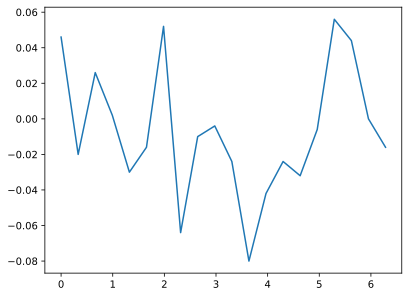

In [243]:
import matplotlib.pyplot as plt
phi=np.linspace(0,2*np.pi,20)
plt.plot(phi,y)

In [244]:
def MSD_encoding_X(theta, phi,basis="z"):

    @squin.kernel
    def parameterized_MSD_encoding():
        q = squin.qalloc(7)  # allocate qubits
        squin.u3(theta,phi,0,q[6])
        for i in range(6):
            squin.sqrt_y_adj(q[i])
        # [squin.broadcast.sqrt_y_adj(q[i]) for i in range(5)]
        squin.cz(q[1], q[2])
        squin.cz(q[3], q[4])
        squin.cz(q[5], q[6])
        squin.sqrt_y(q[6])
        squin.cz(q[0],q[3])
        squin.cz(q[2],q[5])
        squin.cz(q[4],q[6])
        for i in range(5):
            squin.sqrt_y(q[i+2])
        # [squin.broadcast.sqrt_y(q[i+2]) for i in range(5)]
        squin.cz(q[0],q[1])
        squin.cz(q[2],q[3])
        squin.cz(q[4],q[5])
        squin.sqrt_y(q[1])
        squin.sqrt_y(q[2])
        squin.sqrt_y(q[4])
        squin.broadcast.h(q)
        squin.broadcast.measure(q)
    
    return parameterized_MSD_encoding

MSD_enc = MSD_encoding_X(np.pi, 0)
stim_circ = bloqade.stim.Circuit(MSD_enc)
sampler = stim_circ.compile_sampler()
samples = sampler.sample(shots=100)
result = 1 - 2 * samples.astype(int)
import numpy as np
print(f"ExpVal:{np.mean(np.array([i[0]*i[1]*i[5] for i in result]))}")

ExpVal:-0.02


In [245]:
phi=np.linspace(0,2*np.pi,20)
y=[]
for i in phi:
    MSD_enc = MSD_encoding_X(np.pi/2, i,basis="z")
    tsim_circ = bloqade.tsim.Circuit(MSD_enc)
    sampler = tsim_circ.compile_sampler()
    samples = sampler.sample(shots=1000)
    result = 1 - 2 * samples.astype(int)
    y.append(np.mean(np.array([j[0]*j[1]*j[5] for j in result])))

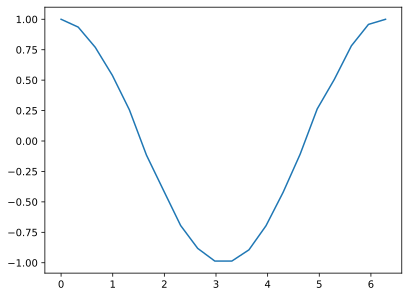

In [246]:
import matplotlib.pyplot as plt
phi=np.linspace(0,2*np.pi,20)
plt.plot(phi,y)